<a href="https://colab.research.google.com/github/FAID-Nacera/Deep-Learning-CNN-/blob/main/Tp_Deep_Learning_CNN_plus_complexe_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#============================
# Step 1: Installer les paquets
#============================

In [ ]:
!pip uninstall keras -y
!pip install tensorflow
!pip install keras

Found existing installation: keras 3.13.0
Uninstalling keras-3.13.0:
  Successfully uninstalled keras-3.13.0
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
Using cached keras-3.13.0-py3-none-any.whl (1.5 MB)


In [ ]:
#=================================
# Step 2: Import libraries
#=================================

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt


/usr/local/lib/python3.12/dist-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
#=================================
# Step 3: Charger dataset
#=================================

In [ ]:
# Permet à l'utilisateur d'uploader des fichiers depuis mon ordinateur vers Colab
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (3).zip


In [ ]:
# Assurez d'extraire le dataset dans /content/v_data avec 'train' et 'test'
!unzip "dataset.zip" -d /content/

Archive:  dataset.zip
replace /content/v_data/test/cars/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/v_data/test/cars/1.jpg  
  inflating: /content/v_data/test/cars/10.jpg  
  inflating: /content/v_data/test/cars/11.jpg  
  inflating: /content/v_data/test/cars/12.jpg  
  inflating: /content/v_data/test/cars/13.jpg  
  inflating: /content/v_data/test/cars/14.jpg  
  inflating: /content/v_data/test/cars/15.jpg  
  inflating: /content/v_data/test/cars/16.jpg  
  inflating: /content/v_data/test/cars/17.jpg  
  inflating: /content/v_data/test/cars/18.jpg  
  inflating: /content/v_data/test/cars/19.jpg  
  inflating: /content/v_data/test/cars/2.jpg  
  inflating: /content/v_data/test/cars/20.jpg  
  inflating: /content/v_data/test/cars/21.jpg  
  inflating: /content/v_data/test/cars/22.jpg  
  inflating: /content/v_data/test/cars/23.jpg  
  inflating: /content/v_data/test/cars/24.jpg  
  inflating: /content/v_data/test/cars/25.jpg  
  inflating: /content/v_data/test/c

In [ ]:
#=================================
# Step 4: Section paramétres
#=================================

In [ ]:
img_width, img_height = 224, 224
train_data_dir = '/content/images/train'
validation_data_dir = '/content/images/test'

nb_train_samples = 400
nb_validation_samples = 100
epochs = 15
batch_size = 16
num_filters = 8
filter_size = 3

# Format des images selon Keras
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

print("Input shape:", input_shape)


Input shape: (224, 224, 3)


In [ ]:
#=================================
# Step 5: Section transformation données
#=================================

In [ ]:
# Générateur d'images pour l'entraînement avec augmentation pour éviter le surapprentissage
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Générateur pour la validation, uniquement normalisation (pas d'augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des images d'entraînement depuis le dossier et application des transformations
train_generator = train_datagen.flow_from_directory(
    '/content/v_data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Chargement des images de validation
validation_generator = test_datagen.flow_from_directory(
    '/content/v_data/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
#=================================
# Step 6: Section architecture du CNN amélioré
#=================================

In [ ]:
# Définition du modèle CNN amélioré
model = Sequential()

# --- 1ère couche convolutive ---
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- 2ème couche convolutive ---
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- 3ème couche convolutive ---
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Dropout pour réduire le surapprentissage ---
model.add(Dropout(0.5))

# --- Couche de flattening ---
model.add(Flatten())

# --- Couche dense intermédiaire ---
model.add(Dense(128))
model.add(Activation('relu'))

# --- Dropout supplémentaire ---
model.add(Dropout(0.5))

# --- Couche de sortie ---
model.add(Dense(2))  # 2 classes
model.add(Activation('softmax'))

# Résumé du modèle
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,690 (49.36 MB)

 Trainable params: 12,938,690 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#=================================
# Step 7: Section entrainement du modéle et évaluation
#=================================

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7300 - loss: 0.6031 - val_accuracy: 0.9167 - val_loss: 0.3050
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8050 - loss: 0.4359 - val_accuracy: 0.8750 - val_loss: 0.3426
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8600 - loss: 0.3587 - val_accuracy: 0.8854 - val_loss: 0.2859
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8650 - loss: 0.3054 - val_accuracy: 0.8958 - val_loss: 0.2476
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8975 - loss: 0.3223 - val_accuracy: 0.8750 - val_loss: 0.2689
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9125 - loss: 0.2290 - val_accuracy: 0.8646 - val_loss: 0.3055
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9150 - loss: 0.2263 - val_accuracy: 0.8333 - val_loss: 0.3455
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9000 - loss: 0.2388 - val_accuracy: 0.8542 - val_loss:

In [ ]:
#=================================
# Step 8: Section visualisation
#=================================

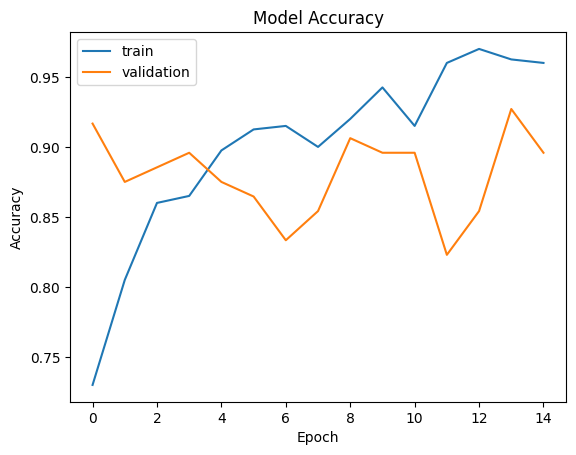

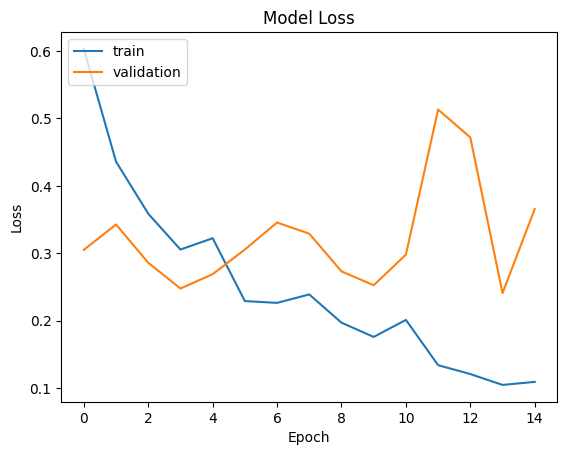

In [ ]:
# Courbes d'accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Courbes de loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()